# Analisis Prediksi Cuaca berdasarkan suhu dan kecepatan angin

Avav Abdillah Sam F551 23 020

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data (path):
  data = pd.read_csv(path)
  return data

In [3]:
def preprocess_data(data):
  # Encoding target variable
  data['weather'] = data['weather'].astype('category').cat.codes  # Convert to numeric classes

  # Features
  features = ['precipitation','temp_max', 'temp_min', 'wind']  # Using temperatures and wind speed
  target = 'weather'  # Target variable for prediction

  # Splitting the data
  X = data[features]
  y = data[target]
  return X, y

In [4]:
def split_data(X, y, test_size=0.2, random_state=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test

In [5]:
def train_model(X_train, y_train):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  return model

In [6]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [7]:
def prediksi_dataBaru(model, data_baru):
  hasil_prediksi = model.predict(data_baru)
  return hasil_prediksi

In [8]:
def decode_prediction(prediction):
    weather_mapping = {
        0: 'drizzle',
        1: 'fog',
        2: 'rain',
        3: 'snow',
        4: 'sun'
    }
    return weather_mapping.get(prediction[0], "Unknown")

In [9]:
df = "seattle-weather.csv"

# 1. Load Data
data = load_data(df)

# 2. Preprocessing
data_clean = preprocess_data(data)

# 3. Split Data
X_train, X_test, y_train, y_test = split_data(data_clean[0], data_clean[1])

# 4. Train Model
model_rf = train_model(X_train, y_train)

# 5. Evaluasi
evaluasi_model = evaluate_model(model_rf, X_test, y_test)

print("Hasil Akurasi : ", evaluasi_model)

Hasil Akurasi :  0.8156996587030717


In [10]:
data_Baru = {
    "precipitation" : 15.5,
    "temp_max" : 20.1,
    "temp_min" : 17.4,
    "wind" : 10.3
}

df2 = pd.DataFrame([data_Baru])
df2

,precipitation,temp_max,temp_min,wind
0,15.5,20.1,17.4,10.3


In [11]:
hasil_dataBaru = prediksi_dataBaru(model_rf, df2)
cuaca = decode_prediction(hasil_dataBaru)

print("Prediksi Cuaca Hari ini : ", hasil_dataBaru)
print("Cuaca Hari ini : ", cuaca)

Prediksi Cuaca Hari ini :  [2]
Cuaca Hari ini :  rain


In [12]:
def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=data['weather'].unique(),
              yticklabels=data['weather'].unique())
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

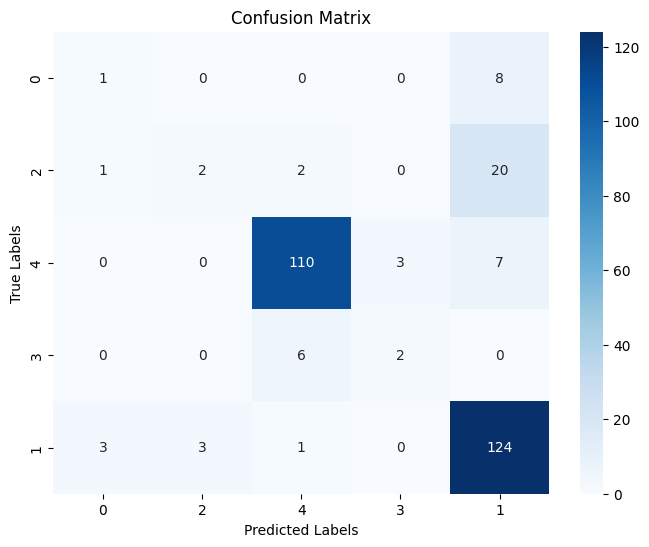

In [13]:
y_pred = model_rf.predict(X_test)
plot_cm(y_test, y_pred)

In [14]:
report = classification_report(y_test, y_pred, target_names=['drizzle', 'fog', 'rain', 'snow', 'sun'])
print(report)

              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293

